In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%run hypothesis.ipynb
%run cost_function.ipynb

In [2]:
datafile = "ex2data2.txt"
columns = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)
x = np.transpose(np.array(columns[:-1]))
y = np.transpose(np.array(columns[-1:]))
m = y.size # number of training examples
# insert the usual column of one into the "x" matrix
x = np.insert(x,0,1,axis=1)

In [3]:
#Divide the sample into two: ones with positive classification, one with null classification
positive = np.array([x[i] for i in range(m) if y[i] == 1])
negative = np.array([x[i] for i in range(m) if y[i] == 0])

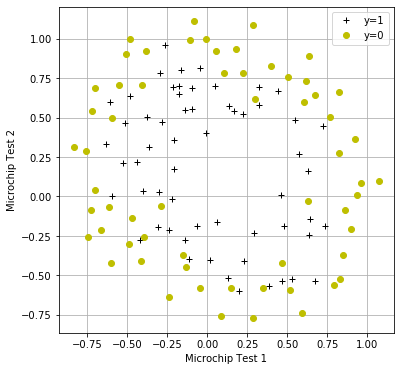

In [4]:
def plotData():
    plt.plot(positive[:,1],positive[:,2],'k+',label='y=1')
    plt.plot(negative[:,1],negative[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(6,6))
plotData()

In [5]:
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [6]:
#Create feature-mapped X matrix
features = mapFeature(x[:,1],x[:,2])

In [7]:
initial_theta = np.zeros((features.shape[1],1))
computeCost(initial_theta,features,y)

0.6931471805599454

In [8]:
#http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html
from scipy import optimize

def optimizeRegularizedTheta(theta,x,y,lambd=0.):
    result = optimize.minimize(computeCost, theta, args=(x, y, lambd),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,features,y)

In [9]:
def plotBoundary(theta, x, y, lambd=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(theta,x,y,lambd)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%lambd}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

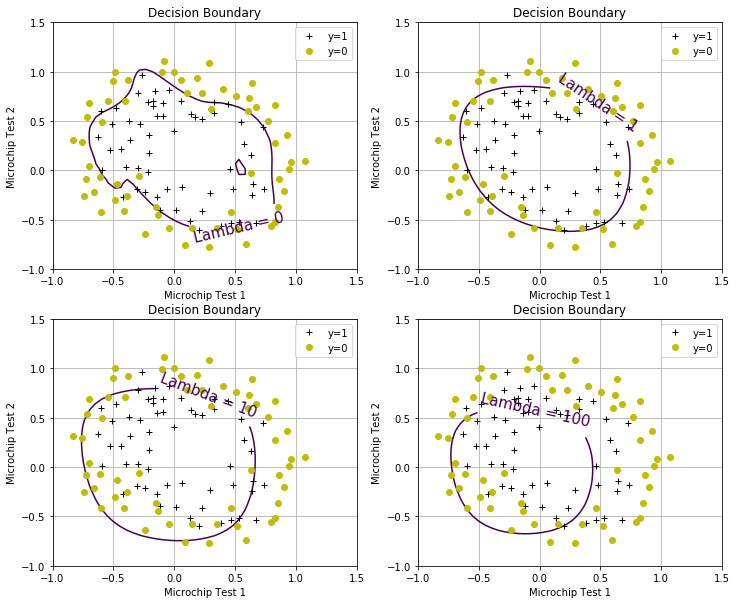

In [10]:
#Build a figure showing contours for various values of regularization parameter, lambda
#It shows for lambda=0 we are overfitting, and for lambda=100 we are underfitting
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData()
plotBoundary(theta,features,y,0.)

plt.subplot(222)
plotData()
plotBoundary(theta,features,y,1.)

plt.subplot(223)
plotData()
plotBoundary(theta,features,y,10.)

plt.subplot(224)
plotData()
plotBoundary(theta,features,y,100.)